In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = pd.read_csv('10_Subject_Dataset/X_train.csv')
y = pd.read_csv('10_Subject_Dataset/y_train.csv')
dataset = pd.concat([x, y] ,axis=1)
labels = ['walking', 'standing', 'sitting', 'downstairs', 'upstrairs', 'jogging', 'biking']

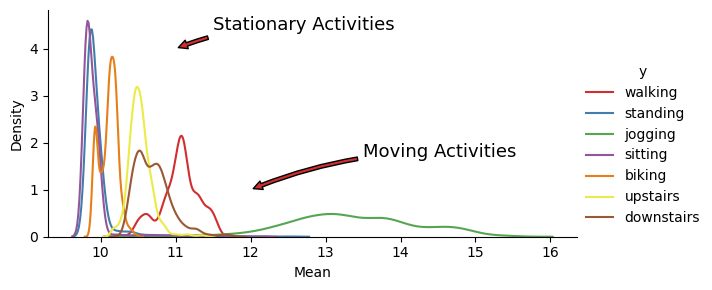

In [6]:
sns.set_palette('Set1', desat=0.80)
facetgrid = sns.FacetGrid(dataset, hue='y', aspect=2)
facetgrid.map(sns.kdeplot, 'Mean')\
    .add_legend()
plt.annotate("Stationary Activities", xy=(11, 4), xytext=(11.5, 4.5), size=13,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle='simple', connectionstyle='arc3, rad=0.1'))
plt.annotate("Moving Activities", xy=(12, 1), xytext=(13.5,1.8), size=13,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle='simple', connectionstyle='arc3, rad=0.1'))
plt.show()

In [8]:
df1 = dataset[dataset['y'] == 'walking']
df2 = dataset[dataset['y'] == 'standing']
df3 = dataset[dataset['y'] == 'jogging']
df4 = dataset[dataset['y'] == 'sitting']
df5 = dataset[dataset['y'] == 'biking']
df6 = dataset[dataset['y'] == 'upstairs']
df7 = dataset[dataset['y'] == 'downstairs']

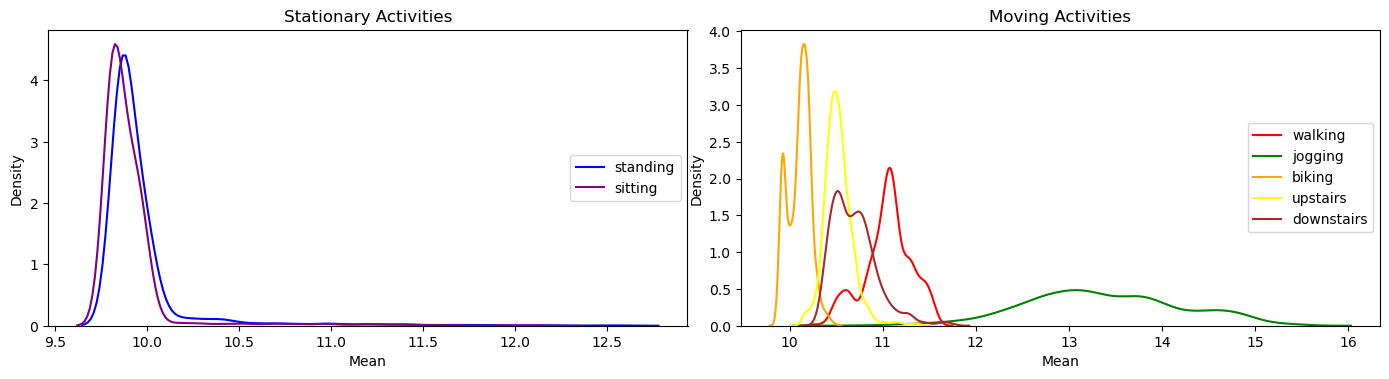

In [23]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities')
sns.kdeplot(df2['Mean'], color = 'blue', label='standing')
sns.kdeplot(df4['Mean'], color = 'purple', label='sitting')
plt.legend(loc='center right')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.kdeplot(df1['Mean'], color = 'red', label='walking')
sns.kdeplot(df3['Mean'], color = 'green', label='jogging')
sns.kdeplot(df5['Mean'], color = 'orange', label='biking')
sns.kdeplot(df6['Mean'], color = 'yellow', label='upstairs')
sns.kdeplot(df7['Mean'], color = 'brown', label='downstairs')
plt.legend(loc='center right')

plt.tight_layout()
plt.show()

In [3]:
data = pd.DataFrame()
for i in range(10):
    participant = pd.read_csv('dataset/Participant_' +str(i+1)+ '.csv', header=1)
    data = pd.concat([data, participant])

In [4]:
df = pd.DataFrame()
df['x'] = data['Ax.1']
df['y'] = data['Ay.1']
df['z'] = data['Az.1']
df['classes'] = data['Unnamed: 69']

In [39]:
mask = df['classes'] == 'upsatirs'
df['classes'].loc[mask] = 'upstairs'

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


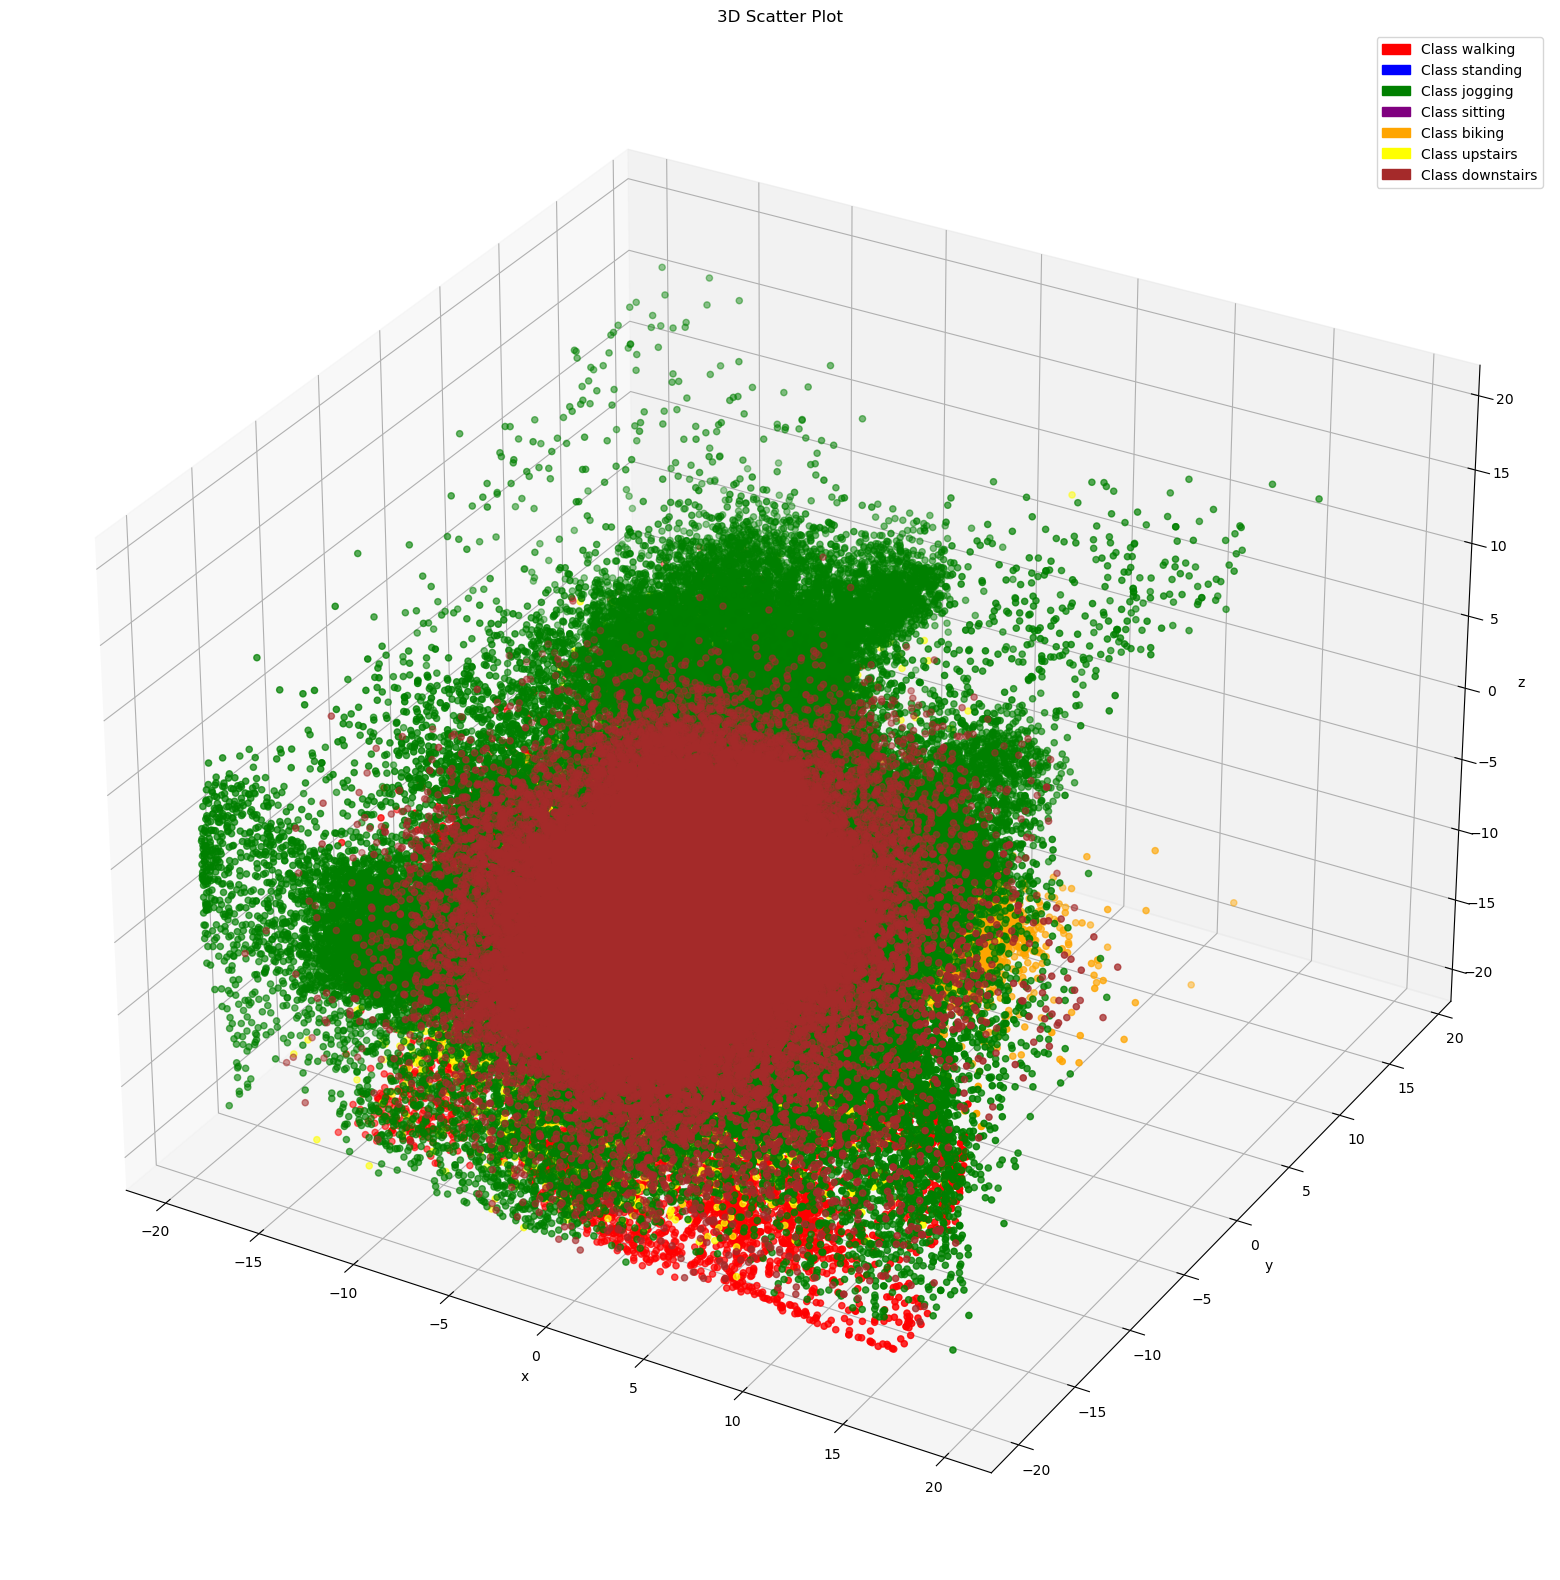

In [41]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')
class_colors = {
    'walking': 'red',
    'standing': 'blue',
    'jogging': 'green',
    'sitting': 'purple',
    'biking': 'orange',
    'upstairs': 'yellow',
    'downstairs': 'brown'
}
unique_classes = df['classes'].unique()
class_patches = []
for class_val in unique_classes:
    class_data = df[df['classes'] == class_val]
    ax.scatter(class_data['x'], class_data['y'], class_data['z'], c=class_colors[class_val], label=f'Class {class_val}')
    class_patch = mpatches.Patch(color=class_colors[class_val], label=f'Class {class_val}')
    class_patches.append(class_patch)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D Scatter Plot')
ax.legend(handles=class_patches)
plt.show()